# Homework #2

## Question 1
Responses in written section

## Question 2: Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target

# Create the modified Iris dataset.
new_X = old_X[old_Y<1.5][:,1:] # We only use last 3 features.
new_Y = old_Y[old_Y<1.5]
new_Y[new_Y == 0] = -1
# Properties of the dataset.
print(new_X.shape) # new_X.shape should be (100, 3), which shows
# 100 data points where each has 3 features.
print(new_Y.shape) # new_Y.shape should be (100,) which shows 100
print(np.unique(new_Y)) # data points where each has label +1/-1.
# Split the dataset into training and test set.
X_train = np.vstack([new_X[:35], new_X[50:85]])
Y_train = np.concatenate([new_Y[:35], new_Y[50:85]])
X_test = np.vstack([new_X[35:50], new_X[85:]])
Y_test = np.concatenate([new_Y[35:50], new_Y[85:]])

(100, 3)
(100,)
[-1  1]


In [2]:
# Get the number of correct predictions.
def correct(X, Y, W, b):
# X: Feature matrix. Shape: [n, 3]. (n is the number of points)
# Y: Label matrix. Shape: [n,].
# W: Weight matrix. Shape: [3,].
# b: Bias. Shape: A scalar.
    count = 0
    for i in range(len(X)):
        if( np.sign(W.T.dot(X[i]) + b) >= 0):
            if(Y[i] == 1):
                count = count + 1
        else:
            if(Y[i] == -1):
                count = count + 1
        ### To be filled. ###
# Return the number of correct predictions.
    return count

In [3]:
# Initialization.
W = np.zeros([3]) # Weight.
b = 0.0 # Bias.
lam = 1 # Lambda. It controls magnitude of weight/bias update.
np.random.seed(3) # Use fixed random seed.

In [4]:
# Perceptron learning algorithm.
error_rate = []
while True:
    for i in range(len(X_train)): # Iterate over all data points.
        Xi = X_train[i] ### To be filled. ### # Get the features of the data point.
        Yi = Y_train[i] ### To be filled. ### # Get the label.

        ### To be filled. ### # Get the prediction.
        Yi_pred = (-1, 1)[np.sign(W.T.dot(Xi) + b) >= 0]
        
        if Yi_pred != Yi: # Compare prediction and label.
            print('Incorrect Label: ', i, Yi, Yi_pred)
            W = W + (lam * (Yi - Yi_pred) * Xi)  ### To be filled. ### # Update weight and bias.
            b = b + (lam * (Yi - Yi_pred))  ### To be filled. ###
# Get the number of correct predictions on training set.
    num_correct = correct(X_train, Y_train, W, b)
# Record the error rate.
    error_rate.append(1 - float(num_correct)/len(X_train))
# If all training data points are predicted correctly, jump out.
    if num_correct == len(X_train):
        break

Incorrect Label:  0 -1 1
Incorrect Label:  35 1 -1
Incorrect Label:  0 -1 1
Incorrect Label:  35 1 -1
Incorrect Label:  0 -1 1


/Users/AdityaS/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if __name__ == '__main__':


In [5]:
# Compute the error rate on the test set.
print('Test error: {}'.format(
(1 - float(correct(X_test, Y_test, W, b)) / len(X_test))))

Test error: 0.0


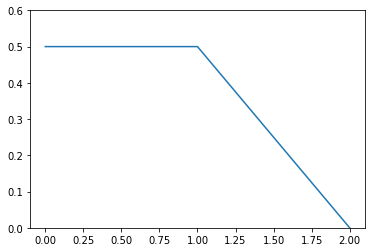

In [6]:
# Plot error rate curve.
plt.ylim(ymax = 0.6)
plt.plot(error_rate)
plt.show()

In [7]:
# Decision boundary.
print('Decision boundary:')
print('{:.3f}x0+{:.3f}x1+{:.3f}x2+{:.3f}=0'.format(
W[0],W[1],W[2],b))

Decision boundary:
-8.200x0+10.400x1+4.400x2+-2.000=0


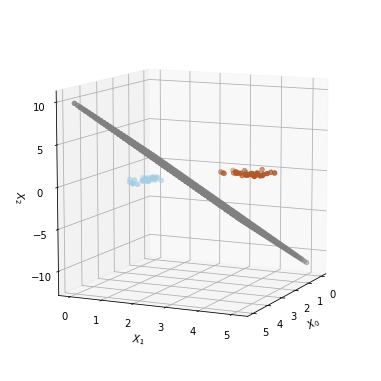

In [8]:
# Set up 3D canvas.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5, 5))

ax = Axes3D(fig, elev=10, azim=25)
ax.set_xlabel('$X_0$')
ax.set_ylabel('$X_1$')
ax.set_zlabel('$X_2$')
# Plot the training points.
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], c=Y_train, cmap=plt.cm.Paired)

# Plot the decision boundary.
num = 30
X0_plane_range = np.linspace(0,5,num)
X1_plane_range = np.linspace(0,5,num)
X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X2_plane = (2 - W[0]*X0_plane - W[1]*X1_plane) / W[2]
### To be filled. ###    W[0]*X_train[:,0], W[1]*X_train[:,1], W[2]*X_train[:,2]
ax.scatter(X0_plane,X1_plane,X2_plane,c='gray')

## Question 3: Least Squares Estimation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X_and_Y = np.load('./q3-least-squares.npy')
X1 = X_and_Y[:, 0] # Shape: (900,)
X2 = X_and_Y[:, 1] # Shape: (900,)
Y = X_and_Y[:, 2] # Shape: (900,)

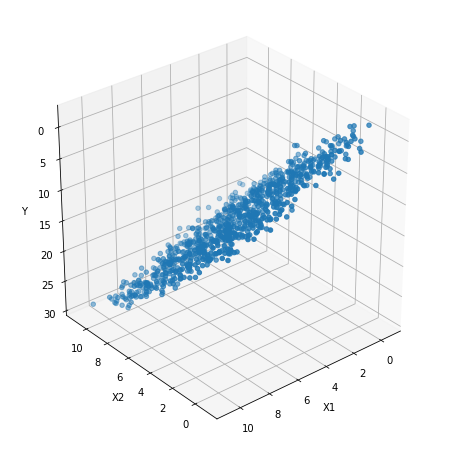

In [10]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [11]:
# Assume Y = w0 + w1 * X1 + W2 * X2
# = (w0, w1, w2).(1, X1, X2) = W.X
ones = np.ones(900)
X = np.array([ones, X1, X2]).T
W = (1/(X.T.dot(X))).dot((X.T.dot(Y)))
########### To be filled ###########
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = 47.30 + 8.59*X1 + 8.48*X2


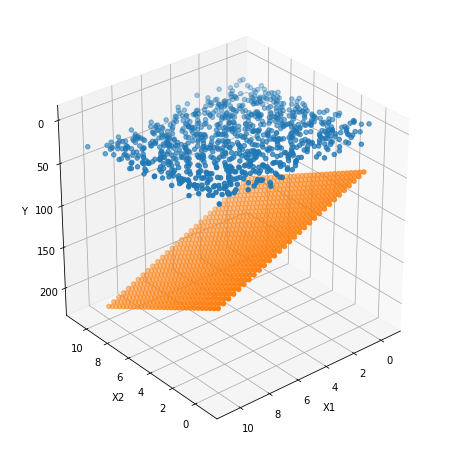

In [12]:
num = 30
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [13]:
# g'(W)
def g_prime_W(X, Y, W):
    return 2 * (X.T.dot(X.dot(W)) - X.T.dot(Y))

In [14]:
# Assume Y = w0 + w1 * X1 + W2 * X2
# = (w0, w1, w2).(1, X1, X2) = W.X
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
# We will keep track of training loss over iterations
iterations = [0]
g_W = [(X.dot(W) - Y).T.dot(X.dot(W) - Y)]
for i in range(10000):
    grad = g_prime_W(X, Y, W)
    W_new = W - 0.000005 * grad
    iterations.append(i+1)
    g_W.append((X.dot(W_new) - Y).T.dot(X.dot(W_new) - Y))
    if np.linalg.norm(W_new - W, ord = 1) < 0.0000001:
        print("gradient descent terminated after " + str(i) + " iterations")
        break
    W = W_new

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

gradient descent terminated after 7049 iterations
Y = -0.70 + 0.98*X1 + 1.94*X2


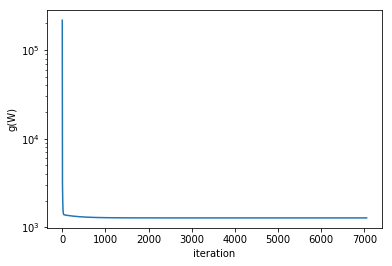

In [15]:
plt.xlabel('iteration')
plt.ylabel('g(W)')
plt.semilogy(iterations, np.array(g_W).reshape(-1, 1))
plt.show()

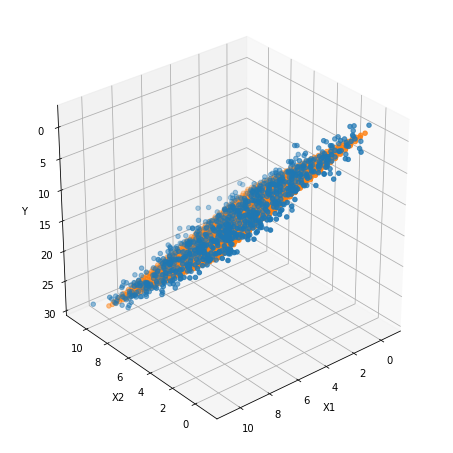

In [16]:
num = 30
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Question 4
Responses in the written section above